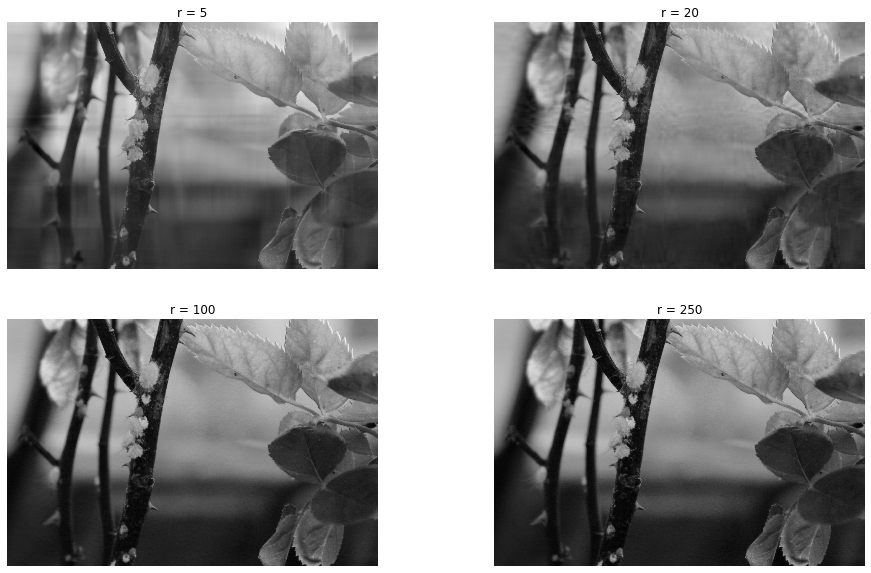

In [1]:
import numpy as np
from matplotlib import animation
from matplotlib.image import imread
import matplotlib.pyplot as plt
from skimage import color

def im2double(im, min_val, max_val):    
    return (im.astype('float') - min_val) / (max_val - min_val)

img = imread('mealybugs.jpg')
img = color.rgb2lab(img)

## Compute SVD
U_a, S_a, VT_a = np.linalg.svd(img[:,:,1], full_matrices=False)
U_b, S_b, VT_b = np.linalg.svd(img[:,:,2], full_matrices=False)

S_a = np.diag(S_a)
S_b = np.diag(S_b)

plt.figure(figsize=(16,10))

j = 1
for r in (5, 20, 100, 250):
    # Construct approximate image
    img_a_approx = U_a[:,:r] @ S_a[:r,:r] @ VT_a[:r,:]
    img_b_approx = U_b[:,:r] @ S_b[:r,:r] @ VT_b[:r,:]
    img_approx = img_a_approx + img_b_approx + img[:,:,0]
    img_approx = color.gray2rgb(img_approx)
    img_approx = np.mean(img_approx, -1)
    
    plt.subplot('22'+str(j))
    j += 1
    plt.title('r = '+str(r))
    plt.axis('off')
    plt.imshow(img_approx, cmap='gray')

plt.show()

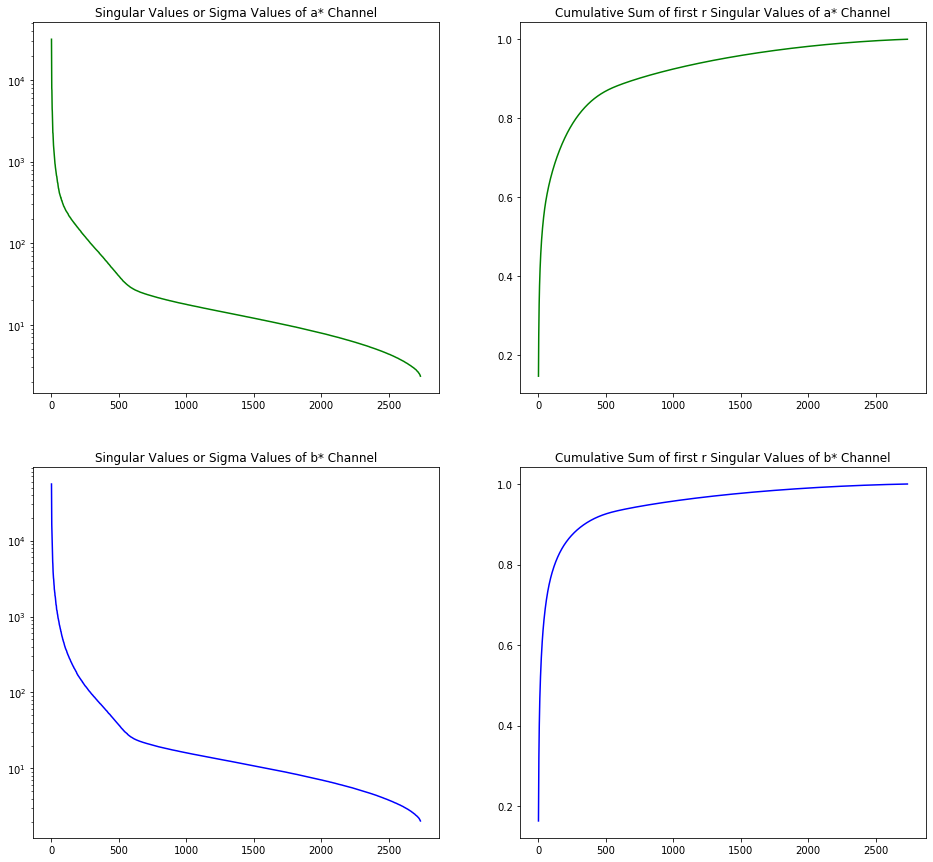

In [11]:
# Plot Sigma and Cumulative energy in first 'r' columns/rows
plt.figure(figsize=(16,15))
plt.subplot('221')
plt.title('Singular Values or Sigma Values of a* Channel')
plt.semilogy(np.diag(S_a), color='g')

plt.subplot('222')
plt.title('Cumulative Sum of first r Singular Values of a* Channel')
plt.plot(np.cumsum(np.diag(S_a))/np.sum(np.diag(S_a)), color='g')

plt.subplot('223')
plt.title('Singular Values or Sigma Values of b* Channel')
plt.semilogy(np.diag(S_b), color='b')

plt.subplot('224')
plt.title('Cumulative Sum of first r Singular Values of b* Channel')
plt.plot(np.cumsum(np.diag(S_b))/np.sum(np.diag(S_b)), color='b')

plt.show()

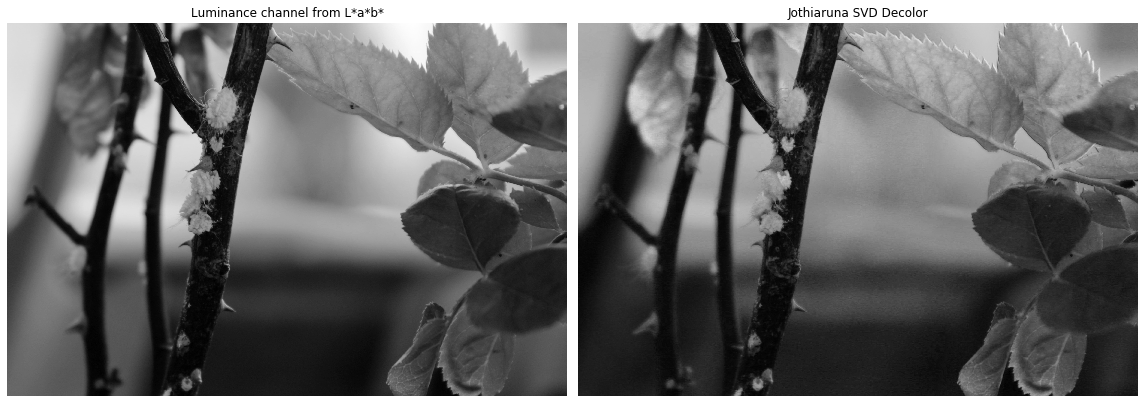

In [12]:
r = 1500
img_l = img[:,:,0]

img_a_approx = U_a[:,:r] @ S_a[:r,:r] @ VT_a[:r,:]
img_b_approx = U_b[:,:r] @ S_b[:r,:r] @ VT_b[:r,:]
img_approx = img_a_approx + img_b_approx + img_l
img_approx = color.gray2rgb(img_approx)
img_approx = np.mean(img_approx, -1)

plt.figure(figsize=(16,12))
plt.subplot('121')
plt.axis('off')
plt.title('Luminance channel from L*a*b*')
plt.imshow(img_l, cmap='gray')
plt.subplot('122')
plt.axis('off')
plt.title('Jothiaruna SVD Decolor')
plt.imshow(img_approx, cmap='gray')
plt.tight_layout()
plt.show()

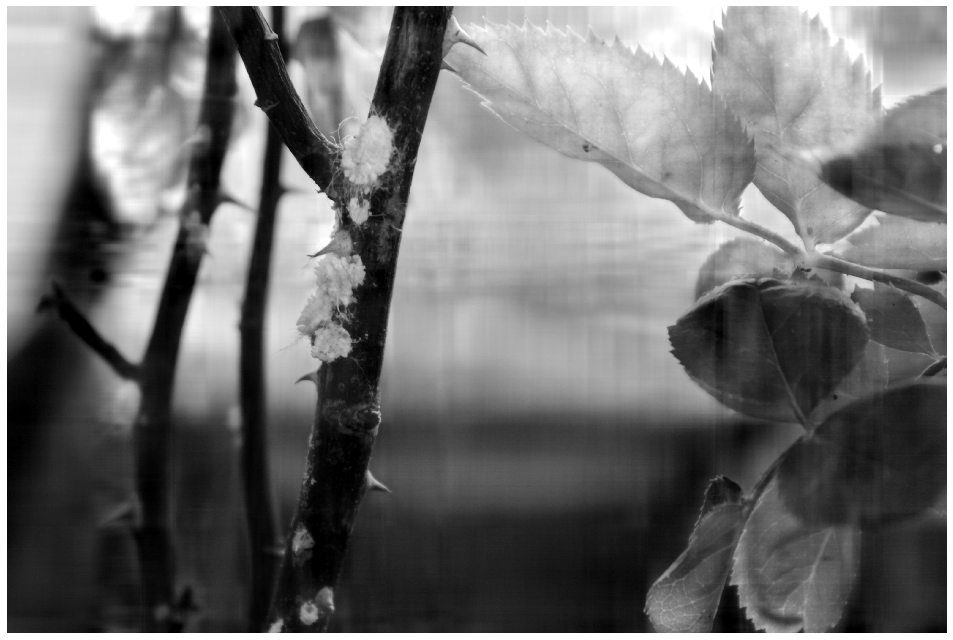

In [3]:
# Generate animation of decolored image over different rank values
max_r = 500

def truncate_USV(r):
    img_a_approx = U_a[:,:r] @ S_a[:r,:r] @ VT_a[:r,:]
    img_b_approx = U_b[:,:r] @ S_b[:r,:r] @ VT_b[:r,:]
    img_approx = img_a_approx + img_b_approx + img[:,:,0]
    img_approx = color.gray2rgb(img_approx)
    img_approx = np.mean(img_approx, -1)
    
    return img_approx

# Animation of image over point of truncation of SVD
fig, ax = plt.subplots(figsize=(16, 12))
ax.set_axis_off()
im = ax.imshow(img[:,:,0], cmap='gray')
fig.tight_layout()

def init():
    im.set_array(img[:,:,0])
    return [im]

def animate(i):
    im.set_array(truncate_USV(i))
    return [im]

ani = animation.FuncAnimation(fig, animate, np.arange(max_r, 5, -5), init_func=init, blit=True)
ani.save('svd_decolor_jothiaruna_anim.mp4', fps=12)